In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv('train (2).csv',usecols=['Ticket','Cabin'])

In [5]:
df.head()

,Ticket,Cabin
0,A/5 21171,NaN
1,PC 17599,C85
2,STON/O2. 3101282,NaN
3,113803,C123
4,373450,NaN


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Ticket  891 non-null    object
 1   Cabin   204 non-null    object
dtypes: object(2)
memory usage: 14.0+ KB


In [15]:
df[df['Ticket'].str.split().apply(lambda x:x[0]).str.isnumeric()]

,Ticket,Cabin
3,113803,C123
4,373450,NaN
5,330877,NaN
6,17463,E46
7,349909,NaN
...,...,...
885,382652,NaN
886,211536,NaN
887,112053,B42
889,111369,C148


In [23]:
df['cabin_nun']=df['Cabin'].str.extract('(\d+)')
df['cabin_cat']=df['Cabin'].str[0]

<AxesSubplot:>

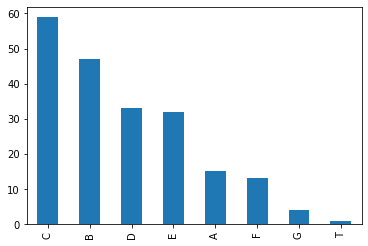

In [28]:
df['cabin_cat'].value_counts().plot(kind='bar')

In [40]:

#  ‘coerce’, then invalid parsing will be set as NaN.
#  ‘integer’ or ‘signed’: smallest signed int dtype (min.: np.int8)

df['Ticket_num']=df['Ticket'].apply(lambda x:x.split()[-1])
df['Ticket_num']=pd.to_numeric(df['Ticket_num'],errors='coerce',downcast='integer')


In [47]:
df['Ticket_cat']=df['Ticket'].apply(lambda x:x.split()[0])
df['Ticket_cat']=np.where(df['Ticket_cat'].str.isdigit(),np.nan,df['Ticket_cat'])

In [55]:
df.head()

,Ticket,Cabin,cabin_nun,cabin_cat,Ticket_num,Ticket_cat
0,A/5 21171,NaN,NaN,NaN,21171.0,A/5
1,PC 17599,C85,85,C,17599.0,PC
2,STON/O2. 3101282,NaN,NaN,NaN,3101282.0,STON/O2.
3,113803,C123,123,C,113803.0,NaN
4,373450,NaN,NaN,NaN,373450.0,NaN
